   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         0.0000e+00                                    0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 0.0000e+00, final cost 0.0000e+00, first-order optimality 0.00e+00.
Optimized camera parameters:
 [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]

 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]]
Optimized 3D points:
 [[0.45616351 0.71613811 0.1846484 ]
 [0.06814152 0.19689706 0.72125623]
 [0.24790922 0.23577665 0.49520356]
 [0.13420735 0.78076912 0.09345203]
 [0.74365093 0.33634129 0.54646933]
 [0.56419712 0.03532566 0.57266655]
 [0.70157559 0.63897557 0.27182657]
 [0.61154868 0.02112984 0.61031153]
 [0.21040072 0.02732758 0.29427148]
 [0.5543216  0.43454467 0.95771573]]


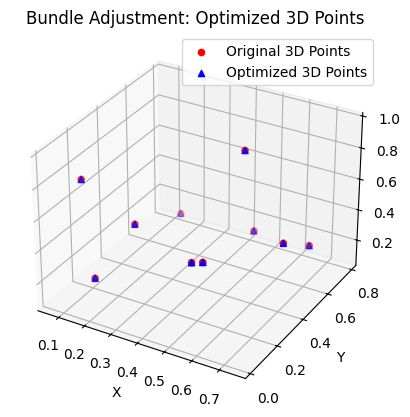

In [1]:
import numpy as np
import cv2
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to project 3D points to 2D using the camera matrix
def project(points_3d, camera_params):
    points_proj = []
    for point in points_3d:
        point = np.append(point, 1)  # Convert to homogeneous
        point_proj = camera_params @ point
        point_proj /= point_proj[2]  # Normalize by depth
        points_proj.append(point_proj[:2])
    return np.array(points_proj)

# Residual function for bundle adjustment
def residuals(params, n_cameras, n_points, camera_indices, point_indices, points_2d):
    camera_params = params[:n_cameras * 12].reshape((n_cameras, 3, 4))  # Assuming P matrix for each camera
    points_3d = params[n_cameras * 12:].reshape((n_points, 3))
    points_proj = project(points_3d[point_indices], camera_params[camera_indices])
    return (points_proj - points_2d).ravel()

# Simulated data
n_cameras = 2
n_points = 10
points_3d = np.random.rand(n_points, 3)  # Random 3D points
camera_params = np.array([np.eye(3, 4) for _ in range(n_cameras)])  # Identity cameras
camera_indices = np.random.randint(0, n_cameras, n_points)  # Random camera indices for each point
point_indices = np.arange(n_points)  # Points used for each camera view
points_2d = project(points_3d, camera_params[camera_indices])  # Projected 2D points

# Bundle adjustment using least squares
initial_params = np.hstack((camera_params.ravel(), points_3d.ravel()))
result = least_squares(residuals, initial_params, verbose=2, x_scale='jac', ftol=1e-4,
                       args=(n_cameras, n_points, camera_indices, point_indices, points_2d))

# Extract optimized camera parameters and 3D points
optimized_camera_params = result.x[:n_cameras * 12].reshape((n_cameras, 3, 4))
optimized_points_3d = result.x[n_cameras * 12:].reshape((n_points, 3))

print("Optimized camera parameters:\n", optimized_camera_params)
print("Optimized 3D points:\n", optimized_points_3d)

# 3D Plotting of the optimized 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original 3D points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='r', marker='o', label='Original 3D Points')

# Plot the optimized 3D points
ax.scatter(optimized_points_3d[:, 0], optimized_points_3d[:, 1], optimized_points_3d[:, 2], c='b', marker='^', label='Optimized 3D Points')

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bundle Adjustment: Optimized 3D Points')

# Show legend
ax.legend()

# Display the plot
plt.show()